# K-Means Algorithm for Clustering

This notebook describes the steps of implementing the KMeans algorithms to perform clustering. Mainly, the main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.


**The steps of KMeans algorithm are as follow:** 

- Step 1: Choose the number of clusters k
- Step 2: Select k random points from the data as centroids
- Step 3: Assign all the points to the closest cluster centroid
- Step 4: Recompute the centroids of newly formed clusters
- Step 5: Repeat steps 3 and 4 until convergence, or reaching the maximum number of iterations

In [22]:
# librararies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs
plt.style.use('dark_background')

**Here, we create a class to accomodate the steps K-Means algorithms from scrtach**

In [23]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row fill up with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], color=y)
        fig.show() # visualize
        
        
    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
            y_pred = self.predict_cluster(clusters, X) # predict function
        if self.plot_figure: # if true
            self.plot_fig(X, y_pred) # plot function 
        return y_pred
            


**Using KMeans Clsutering class to fit randomly sampled data**

In [24]:
np.random.seed(10)
num_clusters = 3 # num of cluster
X, _ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters) # create dataset using make_blobs from sklearn datasets
# visualize original data
fig0 = px.scatter(X[:, 0], X[:, 1])
fig0.show() 

# cluster data and visualize them again
Kmeans = KMeansClustering(X, num_clusters)
y_pred = Kmeans.fit(X)


**Next, we will try to use the KMeans clustering functions on real dataset installed from kaggle**

Read data

In [25]:
df = pd.read_csv("./data/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Decribe data

In [26]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Preprocessing with standard scaler

In [27]:
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(df)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Fit data with our KMeans method created above

In [28]:
num_clusters = 5 # num of cluster
X = data_scaled

# cluster data and visualize them again
Kmeans = KMeansClustering(X, num_clusters)
pred = Kmeans.fit(X)

dataset = df.copy()
dataset["cluster"] = pred

3D scatter plot

In [29]:
fig = px.scatter_3d(dataset, x="Grocery", y="Milk", z="Fresh", color='cluster', size="Fresh", size_max=30)
fig.show()

**Use embedded KMeans clustering algorithm in SKLearn library**

In [30]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

dataset = df.copy()
dataset["cluster"] = pred

In [31]:
fig = px.scatter_3d(dataset, x="Grocery", y="Milk", z="Fresh", color='cluster', size="Fresh", size_max=30)
fig.show()

**Using Elbow method to estimate the number of clusters automatically (this is a heuristic technique)**

Text(0, 0.5, 'Inertia')

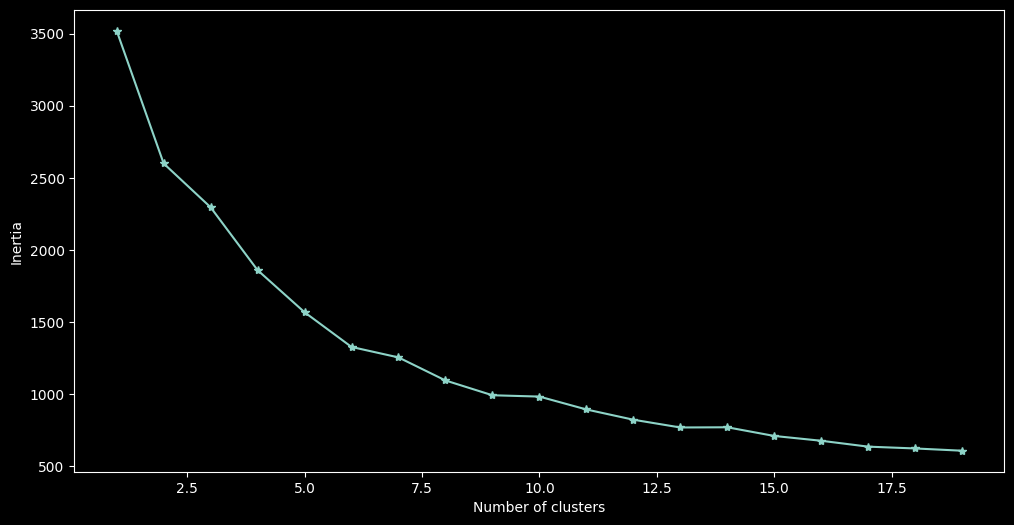

In [32]:
SSE = [] # The sum of squared error
for i in range(1,20):
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++') # iterate from range (1, 20)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

*The above chart indicates that the optimal number pf cluster is a value between 5 and 8.*

**Activity**: Please re-run the above code again, while changing the number of clusters to be values from 4 to 10 and note down the differences on the predicted clusters